In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [8]:
pd.set_option('display.max_column',None)

In [9]:
original_df = pd.read_csv('../Dataset/02_cleaned_data.csv')

In [10]:
df = original_df.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

## Preliminary Analysis

In [12]:
df.isna().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day          0
distance                3630
dtype: int64

In [14]:
#total num of rows with missing values
df.isna().any(axis=1).sum()

7438

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [19]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [30]:
#check duplicate
num_cols = ['age','ratings','restaurant_latitude','restaurant_longitude','delivery_latitude','delivery_longitude','time_taken','pickup_time_minutes','distance']
cat_cols = [col for col in df.columns if col not in num_cols]

In [31]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day']

In [32]:
len(num_cols) , len(cat_cols)

(9, 17)

In [35]:
df.assign(**{
    col: df[col].astype('object') for col in cat_cols
}).describe(include='object').T

,count,unique,top,freq
rider_id,45502,1320,PUNERES01DEL01,67
order_date,45502,44,2022-03-15,1190
weather,44977,6,Fog,7654
traffic,44992,4,low,15477
vehicle_condition,45502,4,2,15034
type_of_order,45502,4,snack,11512
type_of_vehicle,45502,4,motorcycle,26427
multiple_deliveries,44509.0,4.0,1.0,28109.0
festival,45274,2,no,44380
city_type,44304,3,metropolitian,34029


## Functions to perform analysis

### Numerical Analysis

/var/folders/s_/8psmrzpd1ljgqhthwdx4fv000000gn/T/ipykernel_8858/1564148069.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


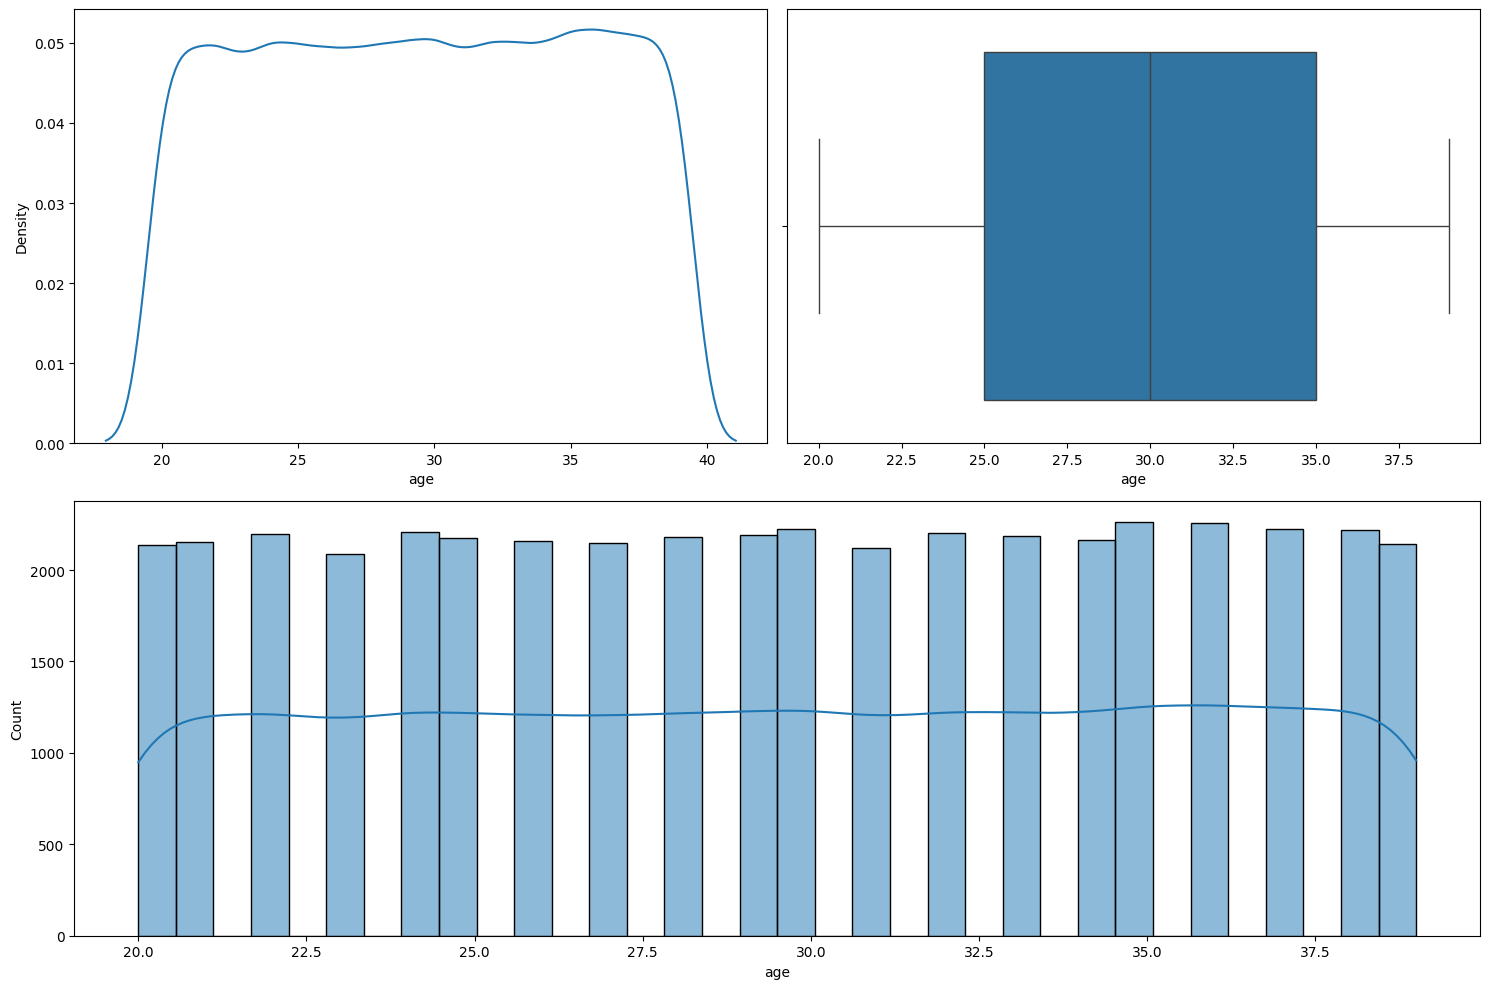

In [48]:
def numerical_analysis(dataframe,column_name,cat_col=None,bins ='auto'):
	fig = plt.figure(figsize=(15,10))
	grid = GridSpec(nrows=2,ncols=2,figure=fig)
   
	axis1 = fig.add_subplot(grid[0,0])
	axis2 = fig.add_subplot(grid[0,1])
	axis3= fig.add_subplot(grid[1,:])
	
	sns.kdeplot(data= dataframe,x=column_name,hue=cat_col , ax=axis1)
	sns.boxplot(data=dataframe,x=column_name,hue=cat_col,ax = axis2)
	sns.histplot
	sns.histplot(data=dataframe,x=column_name,hue=cat_col,bins=bins,kde=True,ax=axis3)
	plt.tight_layout()
	fig.show()

numerical_analysis(df,'age')

### numerical categorical analysis

In [57]:
def numerical_categorical_analysis(dataframe,num_col,cat_col):
	fig,axis = plt.subplots(nrows=2,ncols=2,figsize = (15,10))
	
	sns.barplot(data= dataframe,x=cat_col,y=num_col,ax=axis[0][0])
	axis[0][0].set_title(f'{cat_col} vs {num_col} barplot')
	# axis[0][0].tick_params(axis = 'x',rotation = 45)
	
	sns.boxplot(data=dataframe,x=cat_col,y=num_col,ax=axis[0][1])
	axis[0][1].set_title(f'{cat_col} vs {num_col} boxplot')

	sns.violinplot(data=dataframe,x=cat_col,y=num_col,ax=axis[1][0])
	axis[1][0].set_title(f'{cat_col} vs {num_col} violinplot')

	sns.stripplot(data=dataframe,x=cat_col,y=num_col,ax=axis[1][1])
	axis[1][1].set_title(f'{cat_col} vs {num_col} stripplot')
	plt.tight_layout()
	fig.show()

### Categorical analysis

,Count,Percentage
weather,,
Fog,7654,17.02%
Stormy,7586,16.87%
Cloudy,7536,16.76%
Sandstorms,7495,16.66%
Windy,7422,16.5%
Sunny,7284,16.19%


num of unique categories = 6
unique categories = ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy' nan]


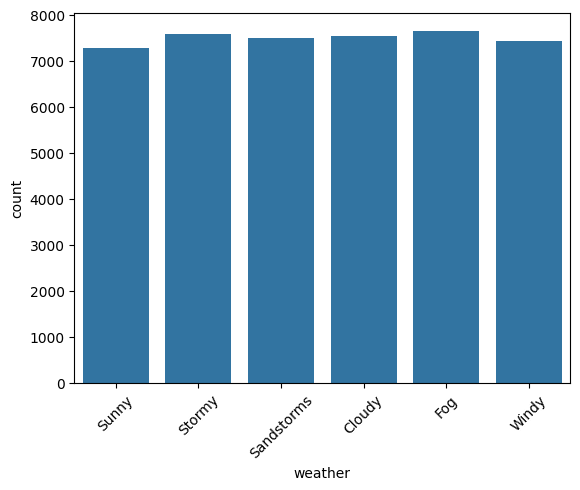

In [63]:
def categorical_analysis(dataframe,cat_col):
 display(
  pd.DataFrame({
					"Count":dataframe[cat_col].value_counts(),
					"Percentage":dataframe[cat_col].value_counts(normalize=True).mul(100).round(2).astype('str').add('%')
     })
     )
 print(f'num of unique categories = {dataframe[cat_col].nunique()}')
 print(f'unique categories = {dataframe[cat_col].unique()}')
 sns.countplot(data=dataframe,x=cat_col)
 plt.xticks(rotation = 45)
 plt.show()

categorical_analysis(df,'weather')